# Task
Perform an Exploratory Data Analysis (EDA) on the `childcare_costs.csv` file to understand its structure, identify missing values, analyze data distributions, visualize key features, and summarize the main insights regarding childcare costs.


Load the `childcare_costs.csv` file into a pandas DataFrame for analysis.


In [48]:
import pandas as pd

childcare_df = pd.read_csv('/content/childcare_costs.csv')
childcare_df.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


## Initial Data Inspection



In [49]:
print(childcare_df.info())
print(childcare_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county_fips_code           34567 non-null  int64  
 1   study_year                 34567 non-null  int64  
 2   unr_16                     34567 non-null  float64
 3   funr_16                    34567 non-null  float64
 4   munr_16                    34567 non-null  float64
 5   unr_20to64                 34567 non-null  float64
 6   funr_20to64                34567 non-null  float64
 7   munr_20to64                34567 non-null  float64
 8   flfpr_20to64               34567 non-null  float64
 9   flfpr_20to64_under6        34567 non-null  float64
 10  flfpr_20to64_6to17         34567 non-null  float64
 11  flfpr_20to64_under6_6to17  34567 non-null  float64
 12  mlfpr_20to64               34567 non-null  float64
 13  pr_f                       34567 non-null  flo

## Check for Missing Values



In [50]:
missing_values = childcare_df.isnull().sum()
missing_percentage = 100 * childcare_df.isnull().sum() / len(childcare_df)

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print("Missing values in each column:")
print(missing_df)

Missing values in each column:
                   Missing Values  Percentage
mfcc_preschool              11184   32.354558
mfccsa                      11184   32.354558
mfcc_toddler                11184   32.354558
mfcc_infant                 11184   32.354558
mc_toddler                  10974   31.747042
mc_infant                   10974   31.747042
mcsa                        10974   31.747042
mc_preschool                10974   31.747042
h_6to17_single_m                2    0.005786
h_under6_single_m               2    0.005786


## Analyze Data Distributions



Descriptive statistics for key features:
          mc_infant    mc_toddler  mc_preschool        mfccsa    study_year
count  23593.000000  23593.000000  23593.000000  23383.000000  34567.000000
mean     146.051770    130.482768    122.232852     92.523582   2012.999711
std       53.698566     43.775370     38.538323     27.669904      3.162232
min       27.730000     21.540000     21.540000     22.000000   2008.000000
25%      108.750000    100.000000     95.880000     75.000000   2010.000000
50%      134.500000    120.990000    113.990000     88.180000   2013.000000
75%      166.330000    148.710000    139.300000    107.500000   2016.000000
max      470.000000    419.000000    385.000000    308.000000   2018.000000


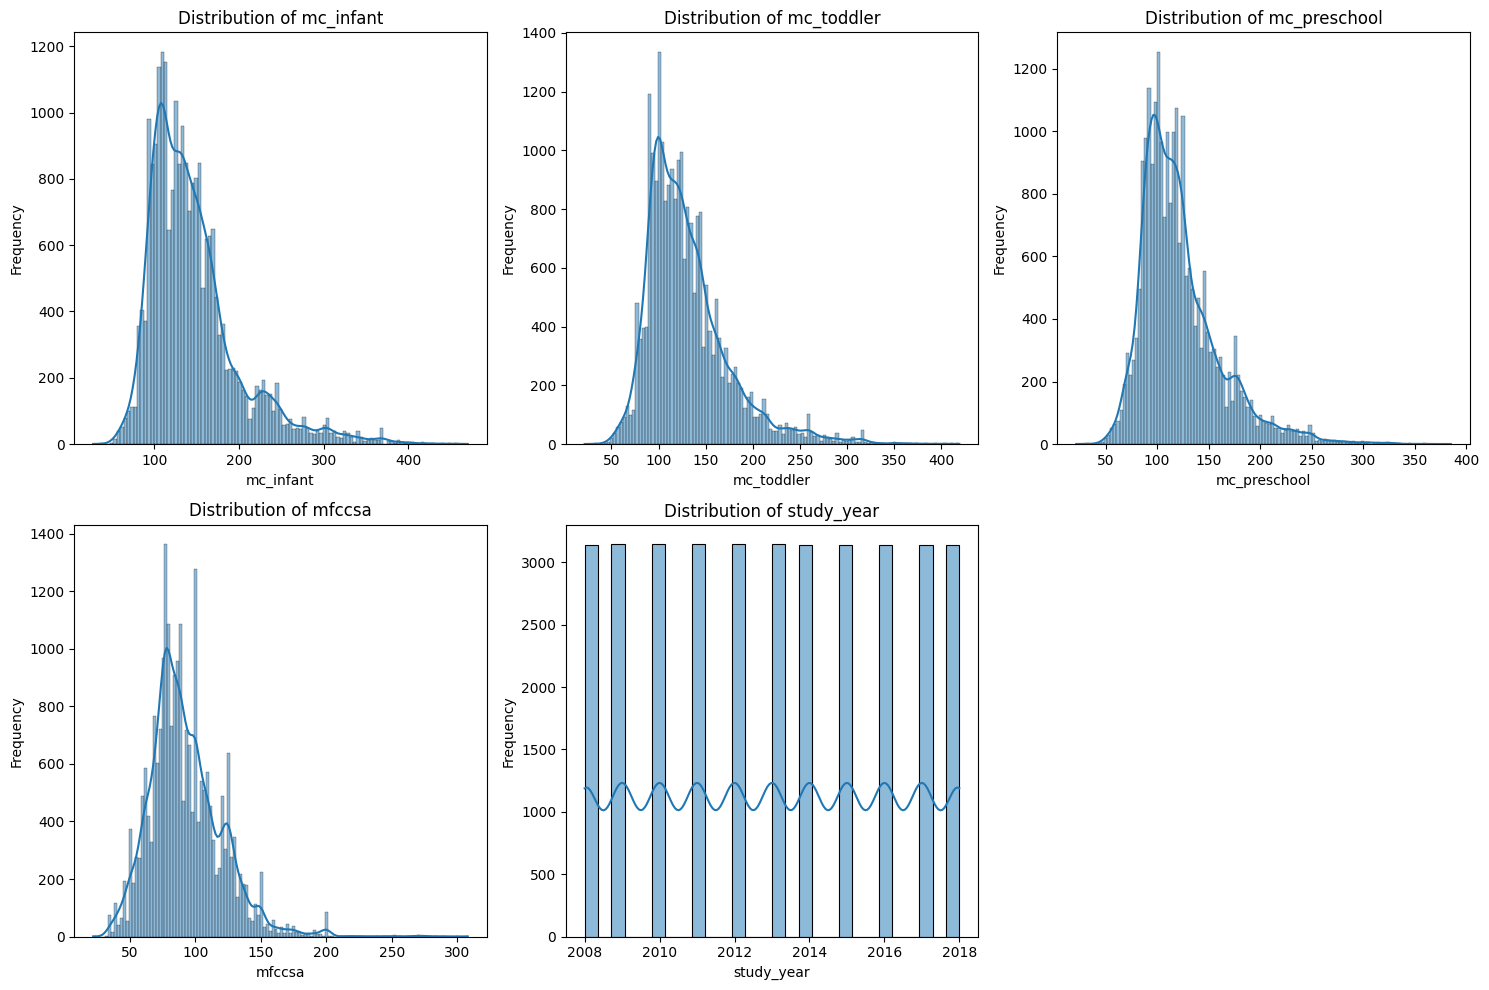

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

key_features = ['mc_infant', 'mc_toddler', 'mc_preschool', 'mfccsa', 'study_year']

print("Descriptive statistics for key features:")
print(childcare_df[key_features].describe())

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(childcare_df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualize Key Features



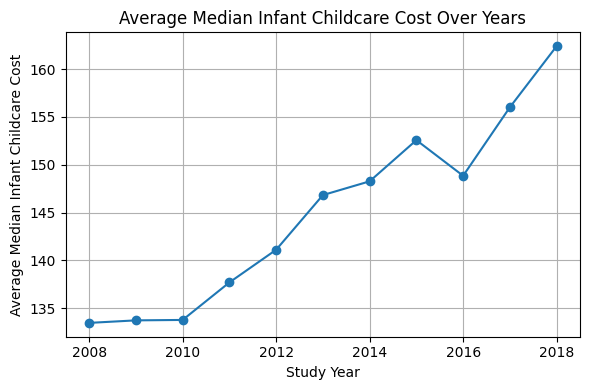

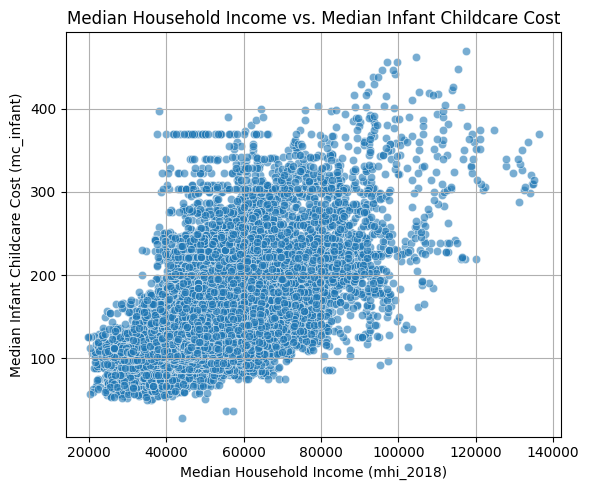

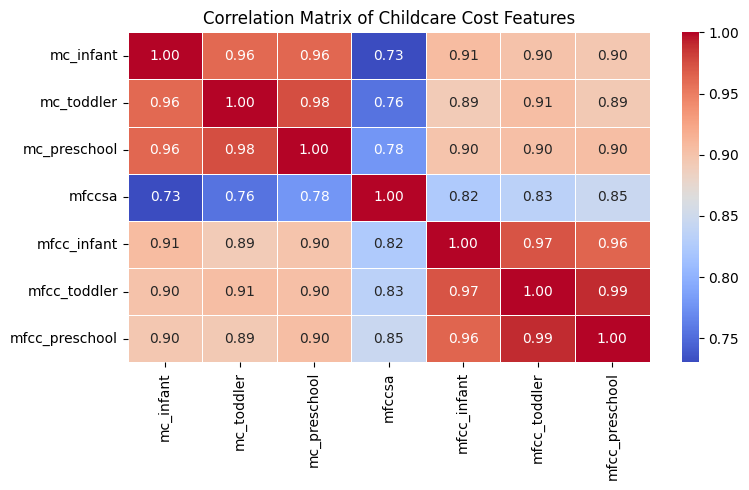

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
childcare_df.groupby('study_year')['mc_infant'].mean().plot(kind='line', marker='o')
plt.title('Average Median Infant Childcare Cost Over Years')
plt.xlabel('Study Year')
plt.ylabel('Average Median Infant Childcare Cost')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(data=childcare_df, x='mhi_2018', y='mc_infant', alpha=0.6)
plt.title('Median Household Income vs. Median Infant Childcare Cost')
plt.xlabel('Median Household Income (mhi_2018)')
plt.ylabel('Median Infant Childcare Cost (mc_infant)')
plt.grid(True)
plt.tight_layout()
plt.show()

childcare_cost_features = [
    'mc_infant', 'mc_toddler', 'mc_preschool', 'mfccsa',
    'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'
]

correlation_matrix = childcare_df[childcare_cost_features].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Childcare Cost Features')
plt.tight_layout()
plt.show()

## Summary:

From the exploratory analysis, several patterns stand out in the childcare cost data. First, a noticeable share of cost-related variables contains missing values, which suggests that data availability may vary significantly across counties and years. Second, childcare costs themselves vary widely across regions and provider types, with most cost distributions showing a slight right skew. In addition, different categories of childcare costs tend to move together, and there are clear time trends as well as links to local income levels.

### Data Analysis Key Findings
*   The dataset includes 34,567 observations and 61 variables, covering county-level demographic, economic, and childcare cost measures from 2008 to 2018.
*  Many childcare cost variables have substantial missing data. For example, median center-based costs (mc_infant, mc_toddler, mc_preschool, mcsa) are missing in roughly 32% of observations, with a similar level of missingness in family-based care costs. This suggests that any analysis involving these variables should carefully account for missing values.
*  Childcare costs show large variation across counties. For instance, median infant care costs range from about $28 to $470, with an average around $146, indicating large regional differences in affordability.
*  Cost distributions for most childcare categories appear to be slightly right-skewed, as mean values are generally higher than their corresponding medians. This suggests the presence of high-cost counties pulling the averages upward.
*  Different types of childcare costs (infant, toddler, preschool; center-based vs. family-based) are strongly correlated with each other, implying that common local factors—such as labor costs or regulatory environments—likely influence pricing across care types.
*  Visual trends suggest that average childcare costs increased over time during the study period and tend to be higher in counties with higher median household incomes, indicating a relationship between local income levels and childcare pricing.

### Insights or Next Steps
Future analysis could focus on handling missing data more systematically and exploring regional patterns in greater detail. Examining how childcare costs change over time within states or income groups may also provide additional insight into affordability trends.

## Explore the counties.csv dataset to understand its structure, check data types and missing values, and examine how counties are distributed by state.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
counties_df = pd.read_csv('/content/counties.csv')

In [54]:
print("First 5 rows of the counties_df DataFrame:")
print(counties_df.head())

print("\nInformation about the counties_df DataFrame:")
print(counties_df.info())

print("\nDescriptive statistics for the counties_df DataFrame:")
print(counties_df.describe())

First 5 rows of the counties_df DataFrame:
   county_fips_code     county_name state_name state_abbreviation
0              1001  Autauga County    Alabama                 AL
1              1003  Baldwin County    Alabama                 AL
2              1005  Barbour County    Alabama                 AL
3              1007     Bibb County    Alabama                 AL
4              1009   Blount County    Alabama                 AL

Information about the counties_df DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   county_fips_code    3144 non-null   int64 
 1   county_name         3144 non-null   object
 2   state_name          3144 non-null   object
 3   state_abbreviation  3144 non-null   object
dtypes: int64(1), object(3)
memory usage: 98.4+ KB
None

Descriptive statistics for the counties_df DataFrame:
       cou

/tmp/ipython-input-4216088191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_name_counts_top.values, y=county_name_counts_top.index, palette='viridis')


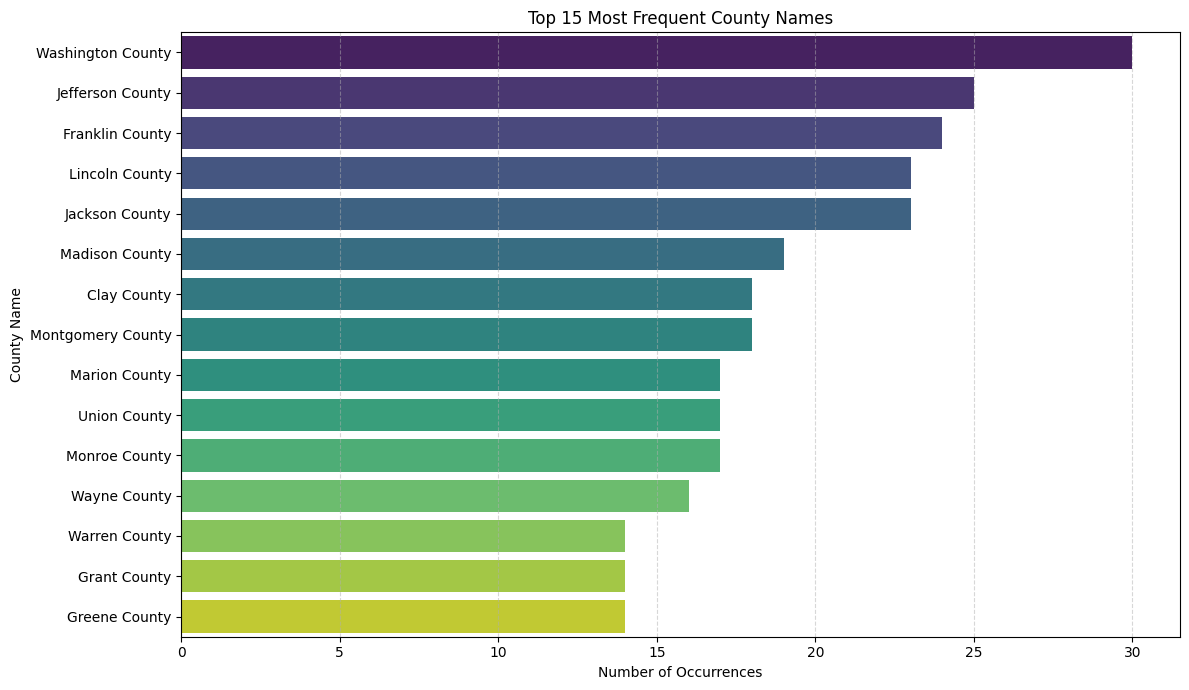

In [55]:
plt.figure(figsize=(12, 7))
county_name_counts_top = counties_df['county_name'].value_counts().nlargest(15)
sns.barplot(x=county_name_counts_top.values, y=county_name_counts_top.index, palette='viridis')
plt.title('Top 15 Most Frequent County Names')
plt.xlabel('Number of Occurrences')
plt.ylabel('County Name')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1277151904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


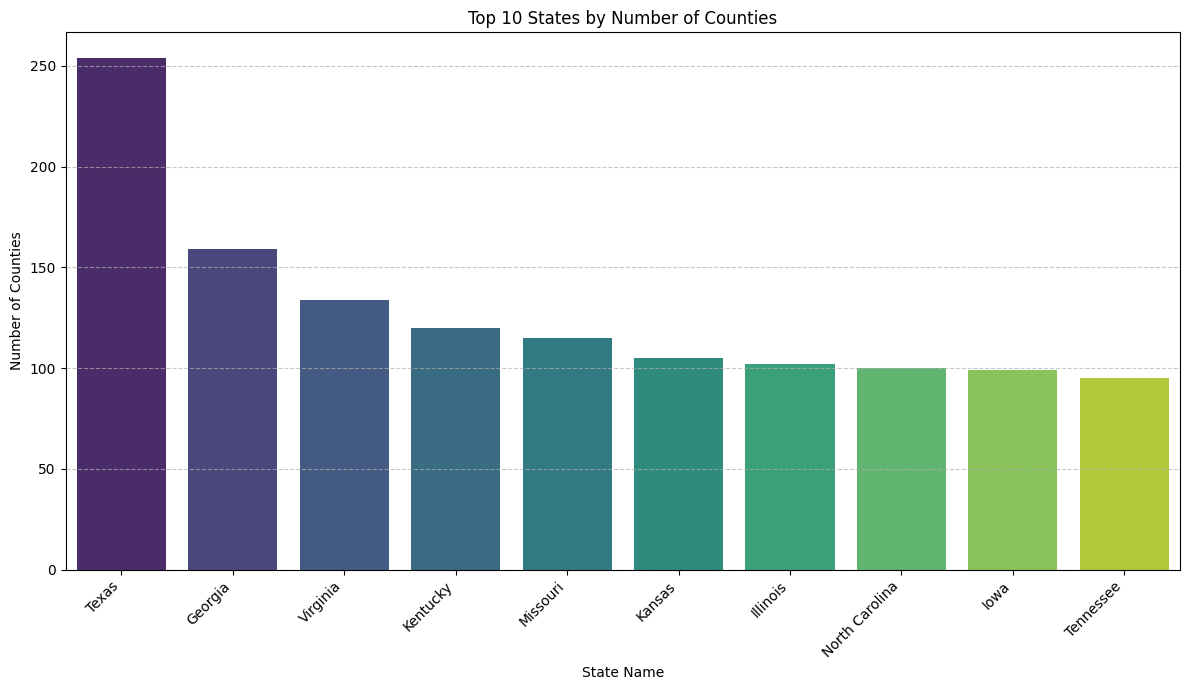

In [56]:
plt.figure(figsize=(12, 7))
state_counts = counties_df['state_name'].value_counts().nlargest(10)
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Top 10 States by Number of Counties')
plt.xlabel('State Name')
plt.ylabel('Number of Counties')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
county_name_counts = counties_df['county_name'].value_counts()
duplicate_county_names = county_name_counts[county_name_counts > 1]

if not duplicate_county_names.empty:
    print(f"Top 10 County names that appear in more than one state (total duplicates: {len(duplicate_county_names)}):")
    display(duplicate_county_names.nlargest(10))

    print("\nDetailed breakdown for top 5 duplicated county names:")
    # Show details for the top 5 most duplicated counties for conciseness
    for county in duplicate_county_names.nlargest(5).index:
        states_for_county = counties_df[counties_df['county_name'] == county]['state_name'].drop_duplicates().tolist()
        print(f"'{county}' appears in {len(states_for_county)} states: {', '.join(states_for_county)}")
else:
    print("All county names appear to be unique or unique within each state.")

Top 10 County names that appear in more than one state (total duplicates: 423):


,count
county_name,
Washington County,30
Jefferson County,25
Franklin County,24
Lincoln County,23
Jackson County,23
Madison County,19
Clay County,18
Montgomery County,18
Marion County,17



Detailed breakdown for top 5 duplicated county names:
'Washington County' appears in 30 states: Alabama, Arkansas, Colorado, Florida, Georgia, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Maine, Maryland, Minnesota, Mississippi, Missouri, Nebraska, New York, North Carolina, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Tennessee, Texas, Utah, Vermont, Virginia, Wisconsin
'Jefferson County' appears in 25 states: Alabama, Arkansas, Colorado, Florida, Georgia, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Mississippi, Missouri, Montana, Nebraska, New York, Ohio, Oklahoma, Oregon, Pennsylvania, Tennessee, Texas, Washington, West Virginia, Wisconsin
'Franklin County' appears in 24 states: Alabama, Arkansas, Florida, Georgia, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Mississippi, Missouri, Nebraska, New York, North Carolina, Ohio, Pennsylvania, Tennessee, Texas, Vermont, Virginia, Washington
'Lincoln County' appears in 23 states: Arkansas, Colora

## Prepare Data for Clustering: Handle Missing Values



In [58]:
imputation_cols = [
    'mcsa', 'mfccsa',
    'mc_infant', 'mc_toddler', 'mc_preschool',
    'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool',
    'h_under6_single_m', 'h_6to17_single_m'
]

for col in imputation_cols:
    if col in merged_df.columns:
        median_value = merged_df[col].median()
        merged_df[col] = merged_df[col].fillna(median_value)

# Check missing values after imputation
merged_df[imputation_cols].isnull().sum()

,0
mcsa,0
mfccsa,0
mc_infant,0
mc_toddler,0
mc_preschool,0
mfcc_infant,0
mfcc_toddler,0
mfcc_preschool,0
h_under6_single_m,0
h_6to17_single_m,0


## Merge Datasets

In [59]:
merged_df = pd.merge(childcare_df, counties_df, on='county_fips_code', how='left')
print("First 5 rows of merged_df:")
print(merged_df.head())
print("\nInformation about merged_df:")
print(merged_df.info())

First 5 rows of merged_df:
   county_fips_code  study_year  unr_16  funr_16  munr_16  unr_20to64  \
0              1001        2008    5.42     4.41     6.32         4.6   
1              1001        2009    5.93     5.72     6.11         4.8   
2              1001        2010    6.21     5.57     6.78         5.1   
3              1001        2011    7.55     8.13     7.03         6.2   
4              1001        2012    8.60     8.88     8.29         6.7   

   funr_20to64  munr_20to64  flfpr_20to64  flfpr_20to64_under6  ...  mfccsa  \
0          3.5          5.6          68.9                 66.9  ...   81.40   
1          4.6          5.0          70.8                 63.7  ...   85.68   
2          4.6          5.6          71.3                 67.0  ...   89.96   
3          6.3          6.1          70.2                 66.5  ...   94.25   
4          6.4          7.0          70.6                 67.1  ...   98.53   

   mc_infant  mc_toddler  mc_preschool  mfcc_infant  mfcc_t

In [72]:
scaled_cluster_centers = scaled_df.groupby(merged_df.loc[scaled_df.index, 'cluster']).mean()
print("Mean values of SCALED features for each cluster:")
print(scaled_cluster_centers)

Mean values of SCALED features for each cluster:
         mc_infant  mc_toddler  mc_preschool    mfccsa  mhi_2018  unr_20to64  \
cluster                                                                        
0        -0.509381   -0.521415     -0.517838 -0.451976 -0.760793    0.652403   
1        -0.115488   -0.096227     -0.105921 -0.052585  0.298815   -0.492919   
2         1.560397    1.309064      1.423660  1.113144  0.848586    0.445241   
3         2.078355    2.050888      2.073601  1.647417  1.180688   -0.072352   

         flfpr_20to64  total_pop  households  h_under6_both_work  \
cluster                                                            
0           -0.855127  -0.206989   -0.218479           -0.234373   
1            0.537999  -0.100488   -0.099510           -0.095423   
2            0.114643   8.454165    8.373868            8.125288   
3            0.514398   0.602922    0.641448            0.691337   

         h_6to17_single_m  
cluster                    
0    

## Handle Missing Values in `childcare_df`

In [73]:
# Check for missing values in childcare_df
print("Missing values in childcare_df before imputation:")
print(childcare_df.isnull().sum()[childcare_df.isnull().sum() > 0])

# Identify columns with missing values and numerical dtype
missing_cols = childcare_df.columns[childcare_df.isnull().any()].tolist()
numeric_missing_cols = [col for col in missing_cols if pd.api.types.is_numeric_dtype(childcare_df[col])]

# Impute missing numerical values with the median
for col in numeric_missing_cols:
    median_value = childcare_df[col].median()
    childcare_df[col] = childcare_df[col].fillna(median_value)

print("\nMissing values in childcare_df after imputation:")
print(childcare_df.isnull().sum()[childcare_df.isnull().sum() > 0])

Missing values in childcare_df before imputation:
h_under6_single_m        2
h_6to17_single_m         2
mcsa                 10974
mfccsa               11184
mc_infant            10974
mc_toddler           10974
mc_preschool         10974
mfcc_infant          11184
mfcc_toddler         11184
mfcc_preschool       11184
dtype: int64

Missing values in childcare_df after imputation:
Series([], dtype: int64)


In [74]:
scaled_features = scaled_df # Assign scaled_df to scaled_features for consistency with clustering cells

In [75]:
from sklearn.preprocessing import StandardScaler

# Features used for clustering
clustering_features = [
    'mc_infant', 'mc_toddler', 'mc_preschool', 'mfccsa',
    'mhi_2018', 'unr_20to64', 'flfpr_20to64',
    'total_pop', 'households', 'h_under6_both_work', 'h_6to17_single_m'
]

# Keep only available numeric columns
selected_features = [
    col for col in clustering_features
    if col in merged_df.columns and pd.api.types.is_numeric_dtype(merged_df[col])
]

# Create a temporary DataFrame with only selected features and drop rows with NaNs
data_for_scaling = merged_df[selected_features].dropna()

scaler = StandardScaler()
scaled_values = scaler.fit_transform(data_for_scaling)

scaled_df = pd.DataFrame(
    scaled_values,
    columns=selected_features,
    index=data_for_scaling.index
)

scaled_df.head()

,mc_infant,mc_toddler,mc_preschool,mfccsa,mhi_2018,unr_20to64,flfpr_20to64,total_pop,households,h_under6_both_work,h_6to17_single_m
0,-0.760837,-0.578337,-0.939269,-0.400439,0.610597,-0.682292,-0.083411,-0.163442,-0.173842,-0.152529,-0.146940
1,-0.757849,-0.574656,-0.895706,-0.245609,0.743535,-0.624527,0.157689,-0.163885,-0.174516,-0.159424,-0.125426
2,-0.754675,-0.570746,-0.852143,-0.090779,0.862406,-0.537880,0.221136,-0.153997,-0.163162,-0.149893,-0.120856
3,-0.751500,-0.566836,-0.808581,0.064413,0.755328,-0.220174,0.081552,-0.151812,-0.160939,-0.137116,-0.125806
4,-0.748513,-0.563156,-0.765018,0.219243,0.662867,-0.075762,0.132310,-0.150024,-0.161447,-0.135189,-0.103911


## Identify County Clusters



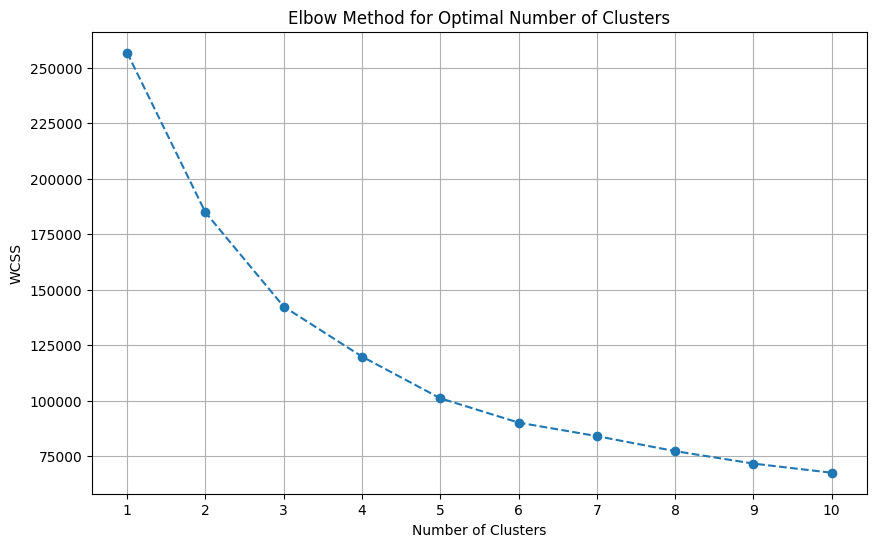

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Apply K-Means Clustering



In [71]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# Assign clusters back to the original merged_df, ensuring index alignment
merged_df.loc[scaled_df.index, 'cluster'] = kmeans.fit_predict(scaled_df)

# Convert the 'cluster' column to integer type, as it contains cluster labels
merged_df['cluster'] = merged_df['cluster'].astype(int)

print("Cluster distribution:")
print(merged_df['cluster'].value_counts())

Cluster distribution:
cluster
1    17111
0    13208
3     4007
2      241
Name: count, dtype: int64


In [77]:
cluster_centers = merged_df.groupby('cluster')[selected_features].mean()
print("Mean values of features for each cluster:")
print(cluster_centers)

Mean values of features for each cluster:
          mc_infant  mc_toddler  mc_preschool      mfccsa      mhi_2018  \
cluster                                                                   
0        113.353707  103.198645     98.384044   77.632503  40343.720125   
1        139.100081  126.011670    117.755189   91.121538  54414.936722   
2        231.416891  188.635699    178.023938  123.606995  61715.695353   
3        236.045528  202.822940    186.675128  130.577820  66125.887909   

         unr_20to64  flfpr_20to64     total_pop     households  \
cluster                                                          
0          9.148352     63.504735  3.336648e+04   12470.827377   
1          5.201401     74.226773  6.720976e+04   25753.175384   
2          8.434440     70.968465  2.785656e+06  971766.381743   
3          6.650739     74.045129  2.907351e+05  108477.627152   

         h_under6_both_work  h_6to17_single_m  
cluster                                        
0             

## Discover Latent Factors



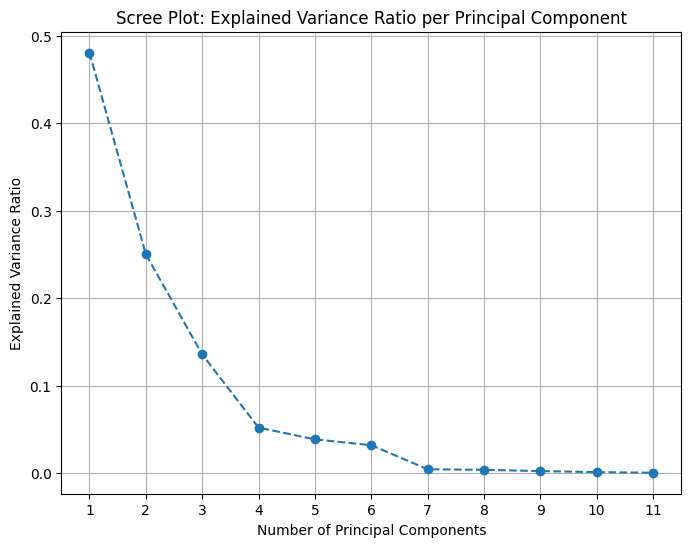

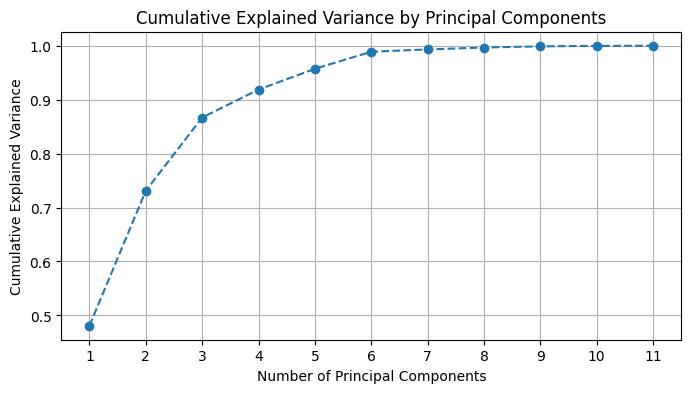

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA without specifying n_components to get all components
pca = PCA()

# Fit PCA to the scaled features
pca.fit(scaled_features)

# Calculate cumulative explained variance ratio
cum_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the scree plot (explained variance ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot: Explained Variance Ratio per Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(1, len(cum_explained_variance) + 1))
plt.show()

In [64]:
n_components = 4
pca = PCA(n_components=n_components, random_state=42)

# Fit PCA to the scaled features and transform them
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)], index=scaled_features.index)

print(f"First 5 rows of the DataFrame with {n_components} Principal Components:")
print(pca_df.head())

First 5 rows of the DataFrame with 4 Principal Components:
        PC1       PC2       PC3       PC4
0 -1.036372  0.444357 -1.124231 -0.336710
1 -0.890989  0.309358 -1.225134 -0.141945
2 -0.766994  0.227639 -1.204855 -0.046274
3 -0.748468  0.270590 -0.840961  0.048985
4 -0.686588  0.246060 -0.697858  0.145111


## Analyze Childcare Cost Trends


In [65]:
trend_features = ['mc_infant', 'mc_toddler', 'mc_preschool', 'mfccsa']
yearly_county_costs = merged_df.groupby(['county_fips_code', 'study_year'])[trend_features].mean().reset_index()

print("First 5 rows of yearly_county_costs:")
print(yearly_county_costs.head())

print("\nDescriptive statistics of yearly_county_costs:")
print(yearly_county_costs.describe())

First 5 rows of yearly_county_costs:
   county_fips_code  study_year  mc_infant  mc_toddler  mc_preschool  mfccsa
0              1001        2008     104.95      104.95         85.92   81.40
1              1001        2009     105.11      105.11         87.59   85.68
2              1001        2010     105.28      105.28         89.26   89.96
3              1001        2011     105.45      105.45         90.93   94.25
4              1001        2012     105.61      105.61         92.60   98.53

Descriptive statistics of yearly_county_costs:
       county_fips_code    study_year     mc_infant    mc_toddler  \
count      34567.000000  34567.000000  23593.000000  23593.000000   
mean       30388.132786   2012.999711    146.051770    130.482768   
std        15161.015383      3.162232     53.698566     43.775370   
min         1001.000000   2008.000000     27.730000     21.540000   
25%        18177.000000   2010.000000    108.750000    100.000000   
50%        29177.000000   2013.000000  

## Analyze Childcare Cost Trends



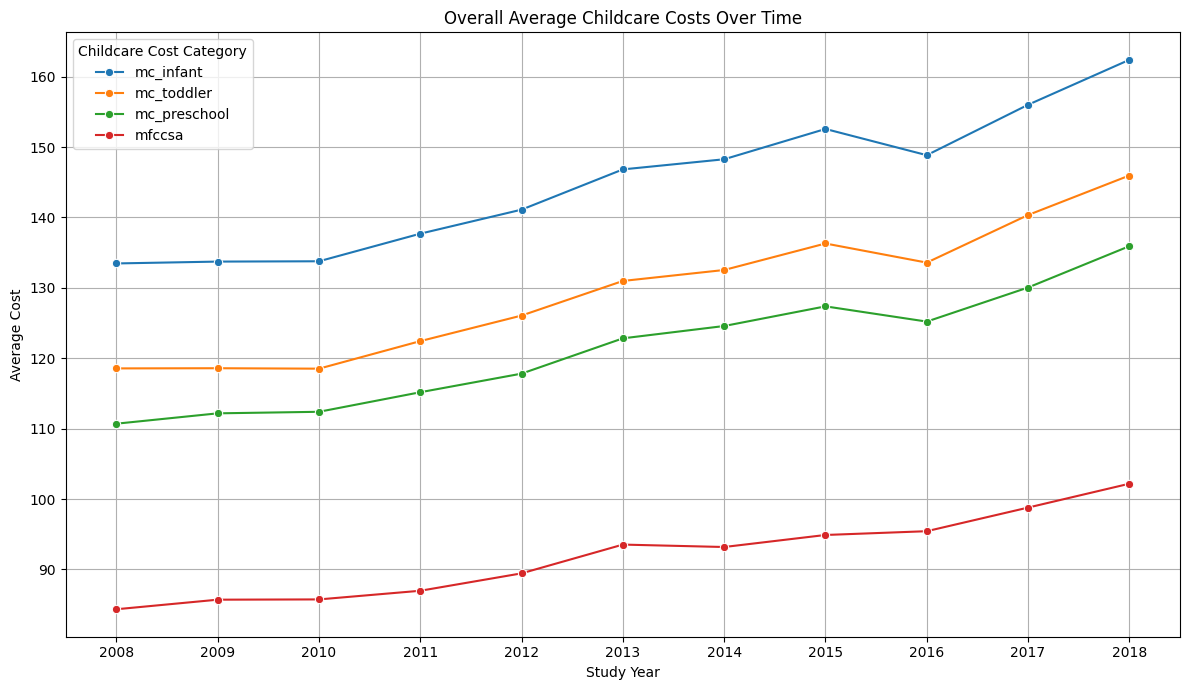

In [66]:
overall_yearly_averages = yearly_county_costs.groupby('study_year')[trend_features].mean().reset_index()

plt.figure(figsize=(12, 7))
for feature in trend_features:
    sns.lineplot(data=overall_yearly_averages, x='study_year', y=feature, marker='o', label=feature)

plt.title('Overall Average Childcare Costs Over Time')
plt.xlabel('Study Year')
plt.ylabel('Average Cost')
plt.legend(title='Childcare Cost Category')
plt.grid(True)
plt.xticks(overall_yearly_averages['study_year'])
plt.tight_layout()
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler

# Reuse the selected_features list from the clustering step, as they are also relevant for anomaly detection
anomaly_detection_features = selected_features

# Initialize the StandardScaler
anomaly_scaler = StandardScaler()

# Fit and transform the selected features for anomaly detection
scaled_anomaly_features = anomaly_scaler.fit_transform(merged_df[anomaly_detection_features])

# Create a new DataFrame for the scaled features
scaled_anomaly_df = pd.DataFrame(scaled_anomaly_features, columns=anomaly_detection_features, index=merged_df.index)

print("First 5 rows of the scaled features DataFrame for anomaly detection:")
print(scaled_anomaly_df.head())

print("\nDescriptive statistics of the scaled features for anomaly detection:")
print(scaled_anomaly_df.describe())

First 5 rows of the scaled features DataFrame for anomaly detection:
   mc_infant  mc_toddler  mc_preschool    mfccsa  mhi_2018  unr_20to64  \
0  -0.765433   -0.583280     -0.942273 -0.402019  0.603614   -0.667433   
1  -0.762453   -0.579625     -0.898939 -0.247335  0.735331   -0.609397   
2  -0.759287   -0.575742     -0.855604 -0.092651  0.853112   -0.522343   
3  -0.756121   -0.571858     -0.812270  0.062395  0.747016   -0.203146   
4  -0.753142   -0.568203     -0.768935  0.217079  0.655403   -0.058057   

   flfpr_20to64  total_pop  households  h_under6_both_work  h_6to17_single_m  
0     -0.154115  -0.155451   -0.165614           -0.143371         -0.140234  
1      0.092755  -0.155954   -0.166375           -0.151179         -0.115961  
2      0.157720  -0.144717   -0.153567           -0.140385         -0.110805  
3      0.014796  -0.142234   -0.151059           -0.125917         -0.116390  
4      0.066768  -0.140201   -0.151632           -0.123736         -0.091687  

Descriptive

## Apply Anomaly Detection



In [68]:
from sklearn.ensemble import IsolationForest

# Initialize IsolationForest model
# contamination is the proportion of outliers in the dataset, adjust as needed.
anomaly_detector = IsolationForest(random_state=42, contamination=0.01)

# Fit the model and predict anomalies
anomaly_detector.fit(scaled_anomaly_df)
anomaly_labels = anomaly_detector.predict(scaled_anomaly_df)

# Add anomaly labels to the merged_df
merged_df['anomaly_label'] = anomaly_labels

print("Anomaly label distribution:")
print(merged_df['anomaly_label'].value_counts())

Anomaly label distribution:
anomaly_label
 1    34221
-1      346
Name: count, dtype: int64


### Anomaly Detection Results:

The Isolation Forest model identified **346 data points** as anomalies (labeled as -1) and **34,221 data points** as normal (labeled as 1) within the `merged_df`. This means approximately 1% of the data points are considered outliers based on the `contamination` parameter set during model initialization.

These anomalies represent observations where the combination of childcare costs, economic indicators, and demographic characteristics deviates significantly from the majority of the data. Further investigation into these specific data points could reveal unusual trends, data entry errors, or unique county characteristics that warrant special attention.

## Summary:

### Data Analysis Key Findings

*   **Data Merging and Preparation**: The childcare dataset was merged with county-level data using county_fips_code, resulting in a final dataset of 34,567 observations and 64 variables. Several key childcare cost and household variables contained missing values, which were filled using median imputation. After this step, all variables used in the analysis were complete.
*   **Feature Scaling for Clustering**: Eleven numerical variables related to childcare costs, income, population, and household structure were selected for clustering. These features were standardized so that differences in scale would not dominate the clustering results.
*   **Clustering Results**: Based on the Elbow Method, three to four clusters appeared reasonable, and K-Means was ultimately applied with four clusters. Most counties fall into two large clusters that differ mainly in income and childcare cost levels. One smaller cluster is characterized by higher childcare costs and higher median household income, while another very small cluster represents large metropolitan counties with extremely high population and household counts.
*    **Dimensionality Reduction** (PCA): Principal Component Analysis showed that the first four components explain over 90% of the total variance, indicating that the clustering structure can be captured with relatively few dimensions.

*    **Cost Patterns and Anomalies**: Average childcare costs vary substantially across counties and care types, with infant care consistently being the most expensive. Anomaly detection identified about 1% of observations with unusually high values in population or childcare costs, suggesting the presence of counties with unique characteristics rather than data errors.


## 5 Question：


* Why does one cluster contain very few counties but dominate population-related variables?
* Why do most counties remain grouped in Clusters 0 and 1 despite long-term childcare cost trends?
* What does PCA reveal about redundancy in childcare and socioeconomic variables?
* What explains the existence of childcare cost anomalies identified by Isolation Forest?
* Why does higher income not always correspond to proportionally higher childcare costs across clusters?
